In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T01:34:03.254126+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
teeplot: 1.4.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": 8,
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.4332275390625e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.12087297439575195}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.006722688674926758}
!!! {"init_...": 0.000568389892578125}
!!! {"ete3Tree": 0.5830888748168945}
!!! {"GenomeTree_hierarchical": 0.0023412704467773438}
!!! {"mutateBranchETEhierarchy": 0.08969831466674805}
!!! {"write_genome_short": 0.04437875747680664}


  1%|          | 1/193 [00:01<03:55,  1.23s/it]

!!! {"writeGenomeNoIndels": 0.16396355628967285}
!!! {"pl.DataFrame": 0.0452723503112793}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.9412541389465332}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.020000696182250977}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.811981201171875e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003309011459350586}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001494884490966797}
!!! {"init_...": 0.0004570484161376953}
!!! {"ete3Tree": 7.367134094238281e-05}
!!! {"GenomeTree_hierarchical": 0.0020673274993896484}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 0.000634193420410

  7%|▋         | 14/193 [00:01<00:12, 14.57it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004951953887939453}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003220081329345703}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010275840759277344}
!!! {"init_...": 0.0004036426544189453}
!!! {"ete3Tree": 0.0007903575897216797}
!!! {"GenomeTree_hierarchical": 0.0019407272338867188}
!!! {"mutateBranchETEhierarchy": 0.00013637542724609375}
!!! {"write_genome_short": 0.00014257431030273438}
!!! {"writeGenomeNoIndels": 0.00024366378784179688}
!!! {"pl.DataFrame": 0.00015425682067871094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005729198455810547}
enter log_context_duration

 13%|█▎        | 26/193 [00:01<00:06, 25.72it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3365, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008066415786743164}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.799003601074219e-05}
!!! {"init_...": 0.00042510032653808594}
!!! {"ete3Tree": 0.01964879035949707}
!!! {"GenomeTree_hierarchical": 0.0019655227661132812}
!!! {"mutateBranchETEhierarchy": 0.004564523696899414}
!!! {"write_genome_short": 0.0023224353790283203}
!!! {"writeGenomeNoIndels": 0.007767200469970703}
!!! {"pl.DataFrame": 0.0014417171478271484}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03983044624328613}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00082993

 21%|██        | 40/193 [00:01<00:03, 39.63it/s]

!!! {"phastSimRun": 0.00010323524475097656}
!!! {"init_...": 0.0005300045013427734}
!!! {"ete3Tree": 0.0004127025604248047}
!!! {"GenomeTree_hierarchical": 0.0024220943450927734}
!!! {"mutateBranchETEhierarchy": 8.106231689453125e-05}
!!! {"write_genome_short": 0.00013208389282226562}
!!! {"writeGenomeNoIndels": 0.0001461505889892578}
!!! {"pl.DataFrame": 9.202957153320312e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0061833858489990234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001919269561767578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003065347671508789}
enter log_context_duration for 

 24%|██▍       | 46/193 [00:02<00:03, 40.27it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008866548538208008}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.703636169433594e-05}
!!! {"init_...": 0.0004076957702636719}
!!! {"ete3Tree": 0.020702123641967773}
!!! {"GenomeTree_hierarchical": 0.0019736289978027344}
!!! {"mutateBranchETEhierarchy": 0.004975318908691406}
!!! {"write_genome_short": 0.002326488494873047}
!!! {"writeGenomeNoIndels": 0.008543968200683594}
!!! {"pl.DataFrame": 0.001605987548828125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.042310476303100586}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008575916290283203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick

 31%|███       | 60/193 [00:02<00:02, 50.74it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032148361206054688}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.894371032714844e-05}
!!! {"init_...": 0.0004074573516845703}
!!! {"ete3Tree": 5.53131103515625e-05}
!!! {"GenomeTree_hierarchical": 0.002119302749633789}
!!! {"mutateBranchETEhierarchy": 9.298324584960938e-06}
!!! {"write_genome_short": 8.273124694824219e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.699562072753906e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004485368728637695}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001745223

 38%|███▊      | 74/193 [00:02<00:02, 56.24it/s]

!!! {"write_genome_short": 0.0005135536193847656}
!!! {"writeGenomeNoIndels": 6.103515625e-05}
!!! {"pl.DataFrame": 0.00010728836059570312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0059795379638671875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020647048950195312}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003091573715209961}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.679794311523438e-05}
!!! {"init_...": 0.00041556358337402344}
!!! {"ete3Tree": 5.459785461425781e-05}
!!! {"GenomeTree_hierarchical": 0.0020635128021240234}
!!! {"mutateBranchETEhierarchy": 9.059906005

 42%|████▏     | 81/193 [00:03<00:03, 28.56it/s]

!!! {"mutateBranchETEhierarchy": 0.3268320560455322}
!!! {"write_genome_short": 0.0014693737030029297}
!!! {"writeGenomeNoIndels": 0.0029234886169433594}
!!! {"pl.DataFrame": 0.0006518363952636719}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.34372425079345703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005230903625488281}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004197120666503906}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001366138458251953}
!!! {"init_...": 0.00046753883361816406}
!!! {"ete3Tree": 0.0039026737213134766}
!!! {"GenomeTree_hierarchical": 0.00204467

 47%|████▋     | 91/193 [00:03<00:03, 31.97it/s]

!!! {"init_...": 0.00087738037109375}
!!! {"ete3Tree": 7.510185241699219e-05}
!!! {"GenomeTree_hierarchical": 0.0025053024291992188}
!!! {"mutateBranchETEhierarchy": 9.775161743164062e-06}
!!! {"write_genome_short": 0.0002646446228027344}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 7.081031799316406e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005532741546630859}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001811981201171875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=11, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031511783599853516}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000102

 53%|█████▎    | 103/193 [00:03<00:02, 38.99it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003263711929321289}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.822845458984375e-05}
!!! {"init_...": 0.0004000663757324219}
!!! {"ete3Tree": 5.626678466796875e-05}
!!! {"GenomeTree_hierarchical": 0.002710580825805664}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 8.344650268554688e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.961822509765625e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004945516586303711}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017428398

 56%|█████▋    | 109/193 [00:03<00:01, 43.46it/s]

!!! {"phastSimRun": 0.00011539459228515625}
!!! {"init_...": 0.0005104541778564453}
!!! {"ete3Tree": 5.650520324707031e-05}
!!! {"GenomeTree_hierarchical": 0.002099752426147461}
!!! {"mutateBranchETEhierarchy": 9.298324584960938e-06}
!!! {"write_genome_short": 6.651878356933594e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.580352783203125e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004813671112060547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001773834228515625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.002983570098876953}
enter log_context_duration for _d

 63%|██████▎   | 122/193 [00:03<00:01, 50.57it/s]

!!! {"write_genome_short": 0.0018076896667480469}
!!! {"writeGenomeNoIndels": 0.0012462139129638672}
!!! {"pl.DataFrame": 0.0002899169921875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011312246322631836}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002942085266113281}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003057718276977539}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.894371032714844e-05}
!!! {"init_...": 0.00042700767517089844}
!!! {"ete3Tree": 5.650520324707031e-05}
!!! {"GenomeTree_hierarchical": 0.002050638198852539}
!!! {"mutateBranchETEhierarchy": 9.5367431640

 70%|██████▉   | 135/193 [00:04<00:01, 56.08it/s]

!!! {"phastSimRun": 0.0001239776611328125}
!!! {"init_...": 0.0005006790161132812}
!!! {"ete3Tree": 6.4849853515625e-05}
!!! {"GenomeTree_hierarchical": 0.0020821094512939453}
!!! {"mutateBranchETEhierarchy": 1.0728836059570312e-05}
!!! {"write_genome_short": 6.985664367675781e-05}
!!! {"writeGenomeNoIndels": 9.775161743164062e-06}
!!! {"pl.DataFrame": 6.651878356933594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005217075347900391}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017905235290527344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=28, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031120777130126953}
enter log_context_duration for _d

 74%|███████▎  | 142/193 [00:04<00:00, 58.61it/s]

!!! {"write_genome_short": 0.0004930496215820312}
!!! {"writeGenomeNoIndels": 1.6927719116210938e-05}
!!! {"pl.DataFrame": 7.581710815429688e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0055925846099853516}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001671314239501953}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0029761791229248047}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.417533874511719e-05}
!!! {"init_...": 0.0004115104675292969}
!!! {"ete3Tree": 5.435943603515625e-05}
!!! {"GenomeTree_hierarchical": 0.002088308334350586}
!!! {"mutateBranchETEhierarchy": 1.00135

 80%|████████  | 155/193 [00:04<00:00, 45.47it/s]

!!! {"mutateBranchETEhierarchy": 0.0059812068939208984}
!!! {"write_genome_short": 0.0033044815063476562}
!!! {"writeGenomeNoIndels": 0.009498119354248047}
!!! {"pl.DataFrame": 0.001920461654663086}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04807686805725098}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009741783142089844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003005504608154297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010752677917480469}
!!! {"init_...": 0.000415802001953125}
!!! {"ete3Tree": 5.888938903808594e-05}
!!! {"GenomeTree_hierarchical": 0.002441644668

 83%|████████▎ | 160/193 [00:05<00:02, 13.67it/s]

!!! {"GenomeTree_hierarchical": 0.31539130210876465}
!!! {"mutateBranchETEhierarchy": 0.042951345443725586}
!!! {"write_genome_short": 0.02157759666442871}
!!! {"writeGenomeNoIndels": 0.0721278190612793}
!!! {"pl.DataFrame": 0.013994932174682617}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.6449863910675049}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005986690521240234}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003119230270385742}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001533031463623047}
!!! {"init_...": 0.00046539306640625}
!!! {"ete3Tree": 8.153915405273438e-05}
!!

 85%|████████▌ | 165/193 [00:05<00:01, 16.70it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.2649765014648438e-05}
len(phylogeny_df)=625, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004634380340576172}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010347366333007812}
!!! {"init_...": 0.0004076957702636719}
!!! {"ete3Tree": 0.0036284923553466797}
!!! {"GenomeTree_hierarchical": 0.0025870800018310547}
!!! {"mutateBranchETEhierarchy": 0.0008795261383056641}
!!! {"write_genome_short": 0.0005474090576171875}
!!! {"writeGenomeNoIndels": 0.0014662742614746094}
!!! {"pl.DataFrame": 0.000354766845703125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011522054672241211}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00030

 92%|█████████▏| 178/193 [00:06<00:00, 24.24it/s]

!!! {"ete3Tree": 0.06433463096618652}
!!! {"GenomeTree_hierarchical": 0.001987934112548828}
!!! {"mutateBranchETEhierarchy": 0.015093803405761719}
!!! {"write_genome_short": 0.007468461990356445}
!!! {"writeGenomeNoIndels": 0.02554035186767578}
!!! {"pl.DataFrame": 0.004773378372192383}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12151670455932617}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0023851394653320312}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003185272216796875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001442432403564453}
!!! {"init_...": 0.000450849533081054

 97%|█████████▋| 188/193 [00:06<00:00, 29.26it/s]

!!! {"GenomeTree_hierarchical": 0.002304553985595703}
!!! {"mutateBranchETEhierarchy": 0.0022335052490234375}
!!! {"write_genome_short": 0.001407623291015625}
!!! {"writeGenomeNoIndels": 0.003715038299560547}
!!! {"pl.DataFrame": 0.0007305145263671875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.022032499313354492}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004928112030029297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003031015396118164}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001010894775390625}
!!! {"init_...": 0.00042176246643066406}
!!! {"ete3Tree": 5.6743621826

100%|██████████| 193/193 [00:06<00:00, 29.76it/s]


enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032110214233398438}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010204315185546875}
!!! {"init_...": 0.00040411949157714844}
!!! {"ete3Tree": 0.00019884109497070312}
!!! {"GenomeTree_hierarchical": 0.0021092891693115234}
!!! {"mutateBranchETEhierarchy": 3.933906555175781e-05}
!!! {"write_genome_short": 8.630752563476562e-05}
!!! {"writeGenomeNoIndels": 6.365776062011719e-05}
!!! {"pl.DataFrame": 8.344650268554688e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0048558712005615234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000

  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.00244140625}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03306007385253906}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.00982356071472168}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002239704132080078}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03314042091369629}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002709627151489258}
enter log_context_duration for seq_arr
exit l

 43%|████▎     | 3/7 [00:00<00:00, 21.99it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03328227996826172}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003359556198120117}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0022430419921875}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03329730033874512}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0032584667205810547}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002312183380126953}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 1.9073486328125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches

100%|██████████| 7/7 [00:00<00:00, 23.59it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.0023956298828125}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025565624237060547}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.034152984619140625}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003596782684326172}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0021414756774902344}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020825624465942383}
enter log_context_duration for res.collect
exit log_context_duration for res.col

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2572770118713379}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': 8,
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.1855297088623047}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 3751/3751 [00:24<00:00, 150.88it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 26.477622032165527}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 3751/3751 [00:03<00:00, 945.03it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 112.49077439308167}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.0666351318359375}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 171.15487909317017}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009014129638671875}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003235340118408203}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0003788471221923828}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0003826618194580078}
ancestral_s


100%|██████████| 368/368 [00:00<00:00, 302885.38it/s]

process mutations:   0%|          | 1/368 [00:00<01:08,  5.33it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:14<11:10,  1.86s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.3s



process mutations:  13%|█▎        | 48/368 [00:50<05:28,  1.03s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   57.4s



process mutations:  24%|██▍       | 88/368 [01:29<04:37,  1.01it/s]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.6min



process mutations:  35%|███▍      | 128/368 [02:09<03:57,  1.01it/s]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.3min



process mutations:  46%|████▌     | 168/368 [02:45<03:12,  1.04it/s]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.9min



process mutations:  57%|█████▋    | 208/368 [03:22<02:31,  1.06it/s]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.6min



process mutations:  67%|██████▋   | 248/368 [04:01<01:55,  1.04it/s]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.3min



process mutations:  78%|███████▊  | 288/368 [04:42<01:18,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  4.9min



process mutations:  89%|████████▉ | 328/368 [05:20<00:38,  1.03it/s]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  5.6min



process mutations: 100%|██████████| 368/368 [06:01<00:00,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.0min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.2min finished


process replicate: 100%|██████████| 1/1 [09:06<00:00, 546.49s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.07575821876525879}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 109
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'd089382f-e5d3-88f8-ae56-d8e8b2a91654', 'd089382f-e5d3-88f8-ae56-d8e8b2a91654', 'd089382f-e5d3-88f8-ae56-d8e8b2
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ phylo_df_background_len        <u16> 7287, 7388, 7286, 7388, 6272
$ phyo_df_screened_len           <u16> 215, 114, 216, 114, 1230
$ tb_stat                        <cat> clade duration ratio, clade duration ratio, 

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


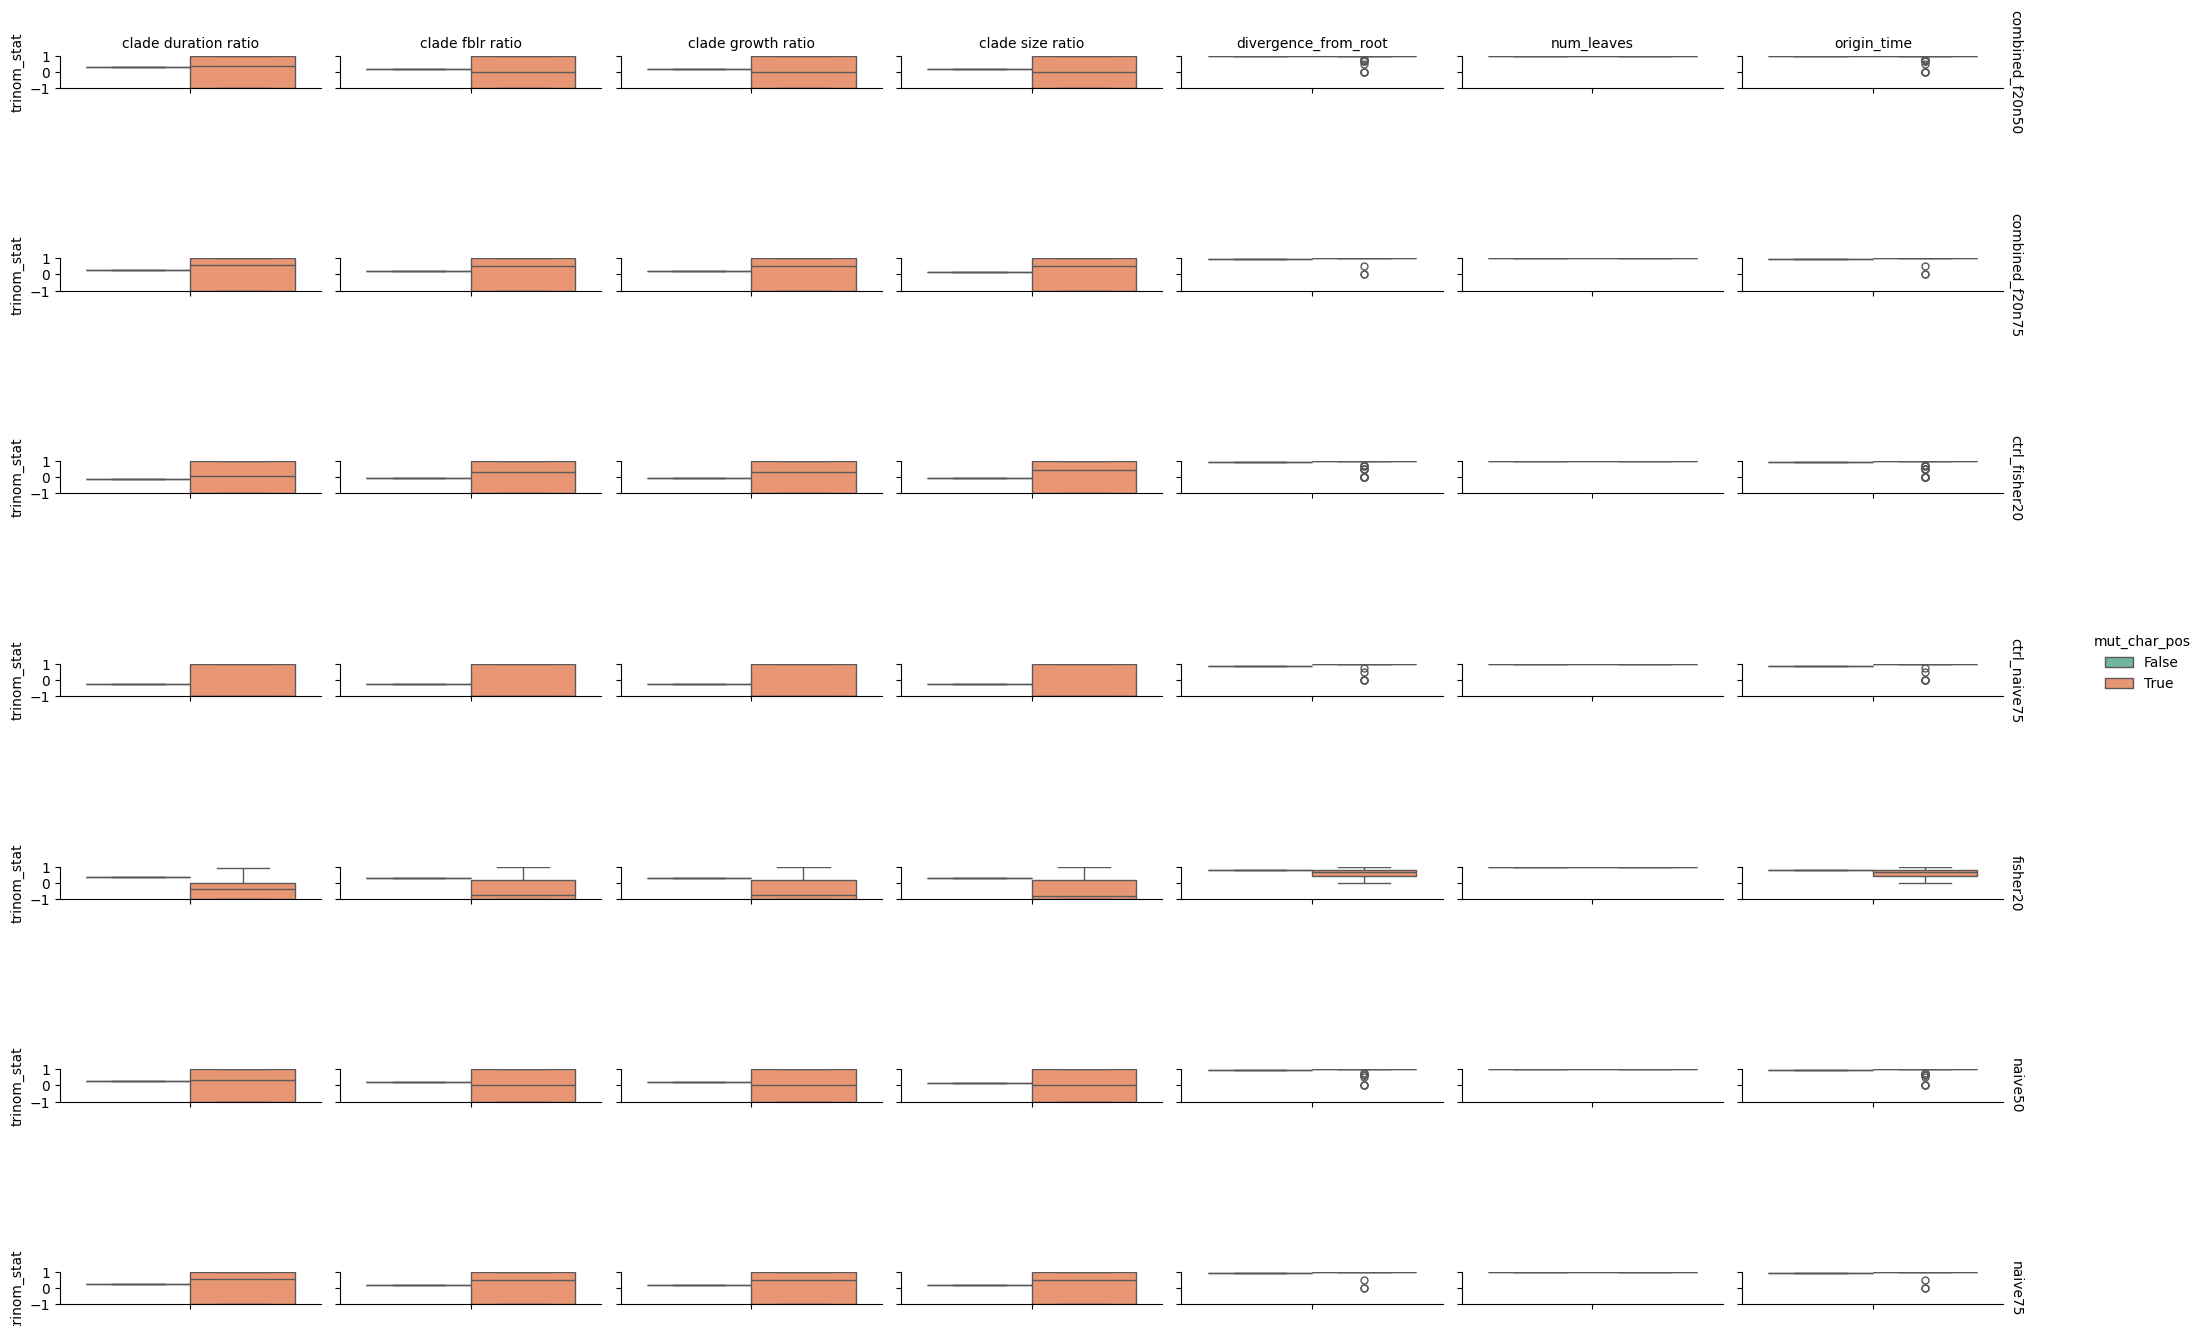

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


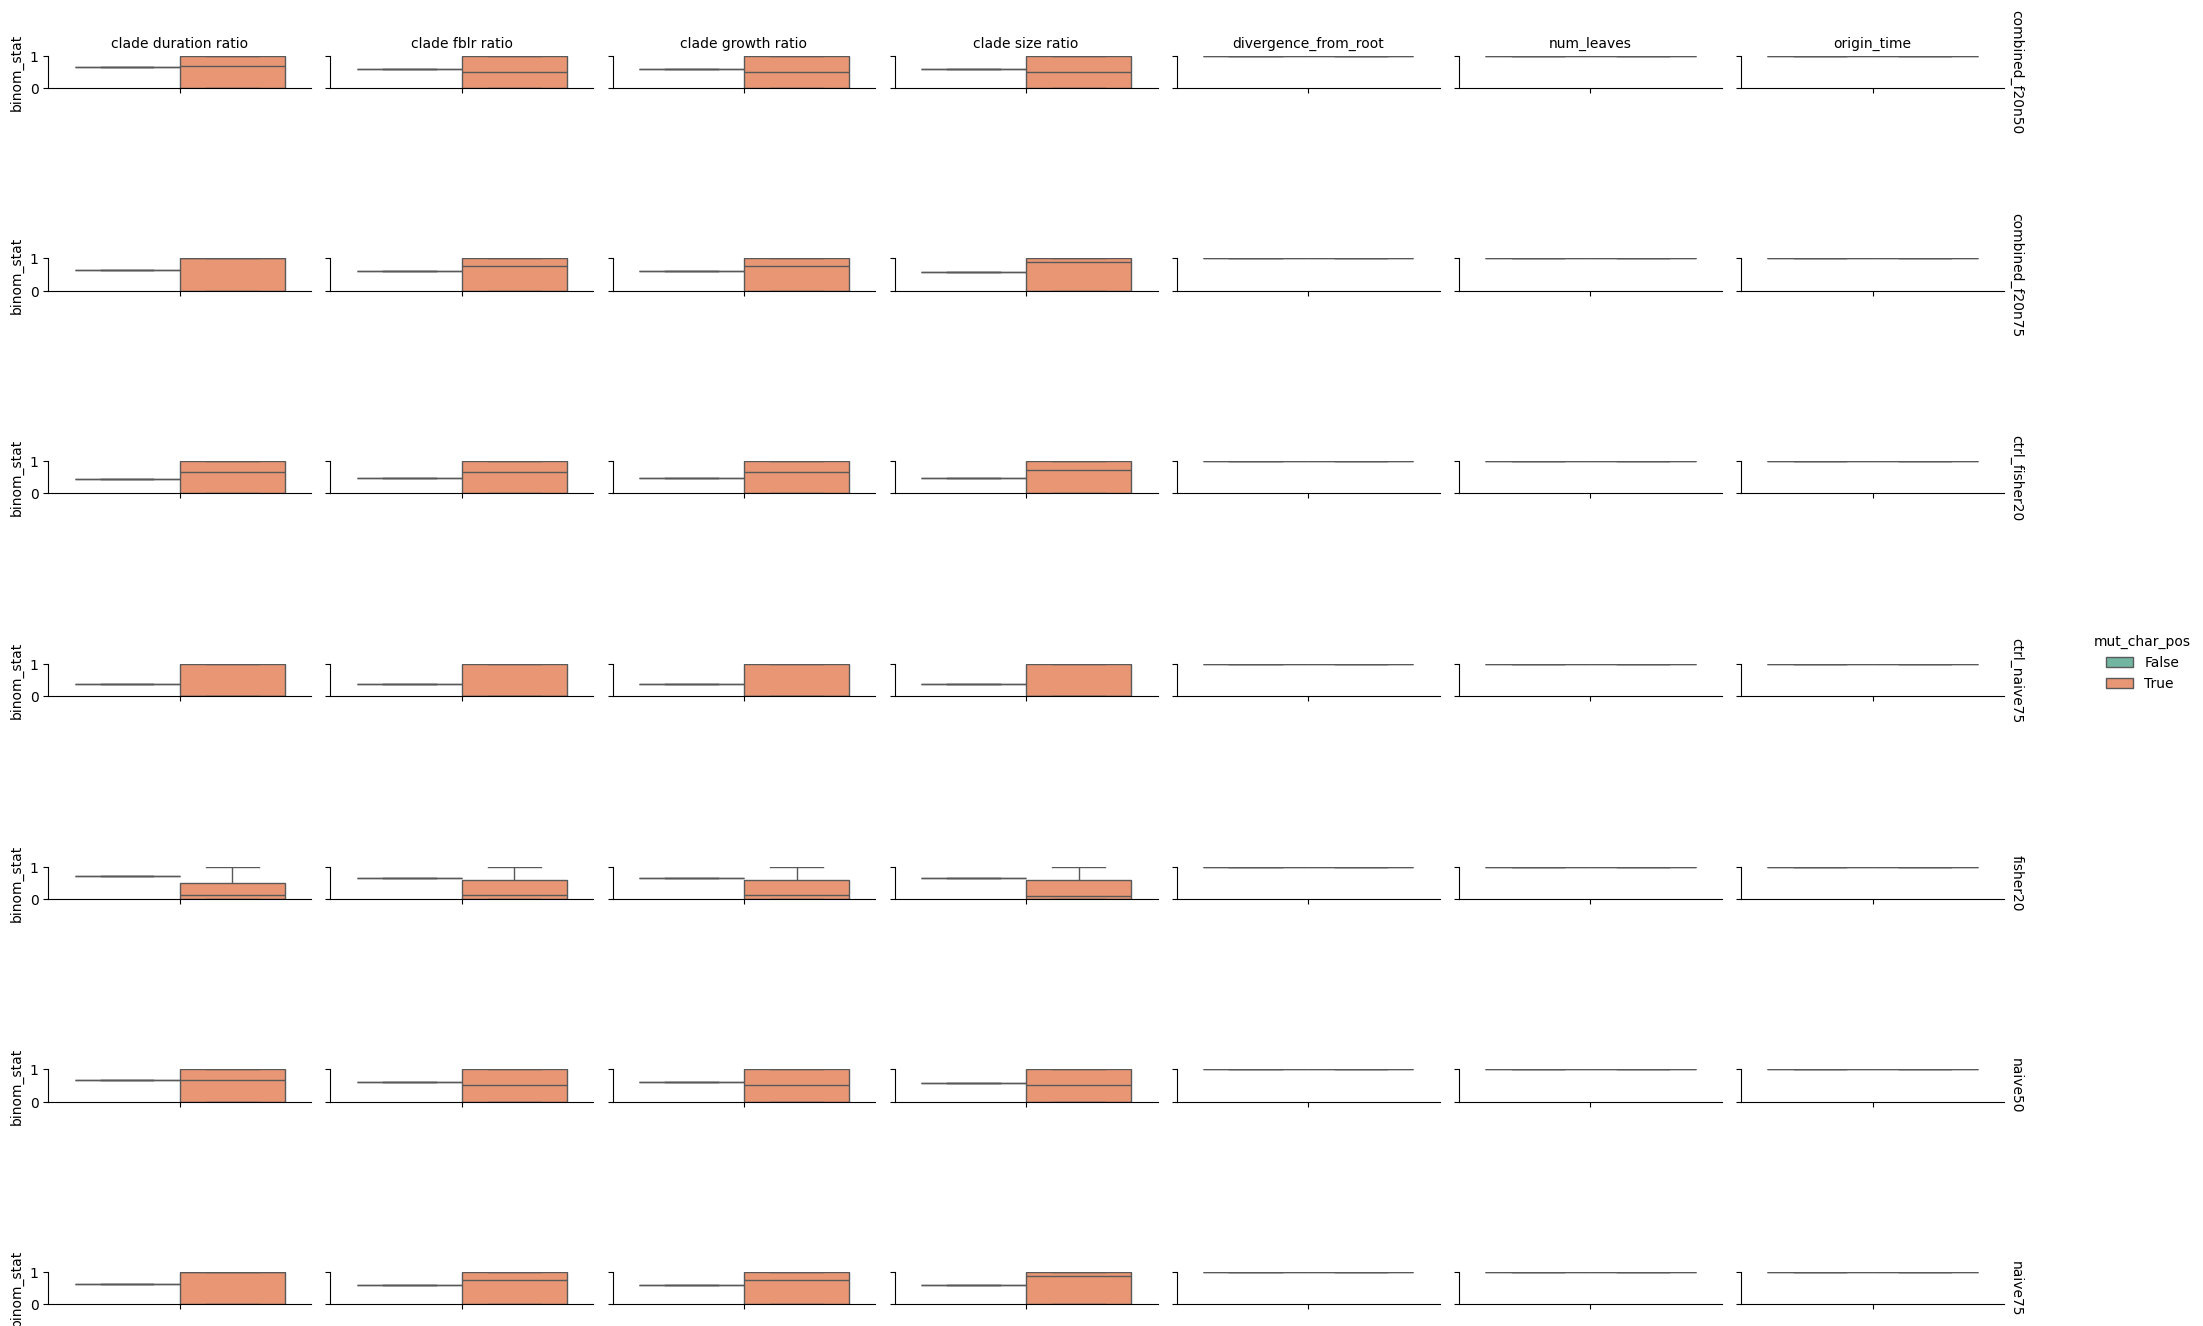

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


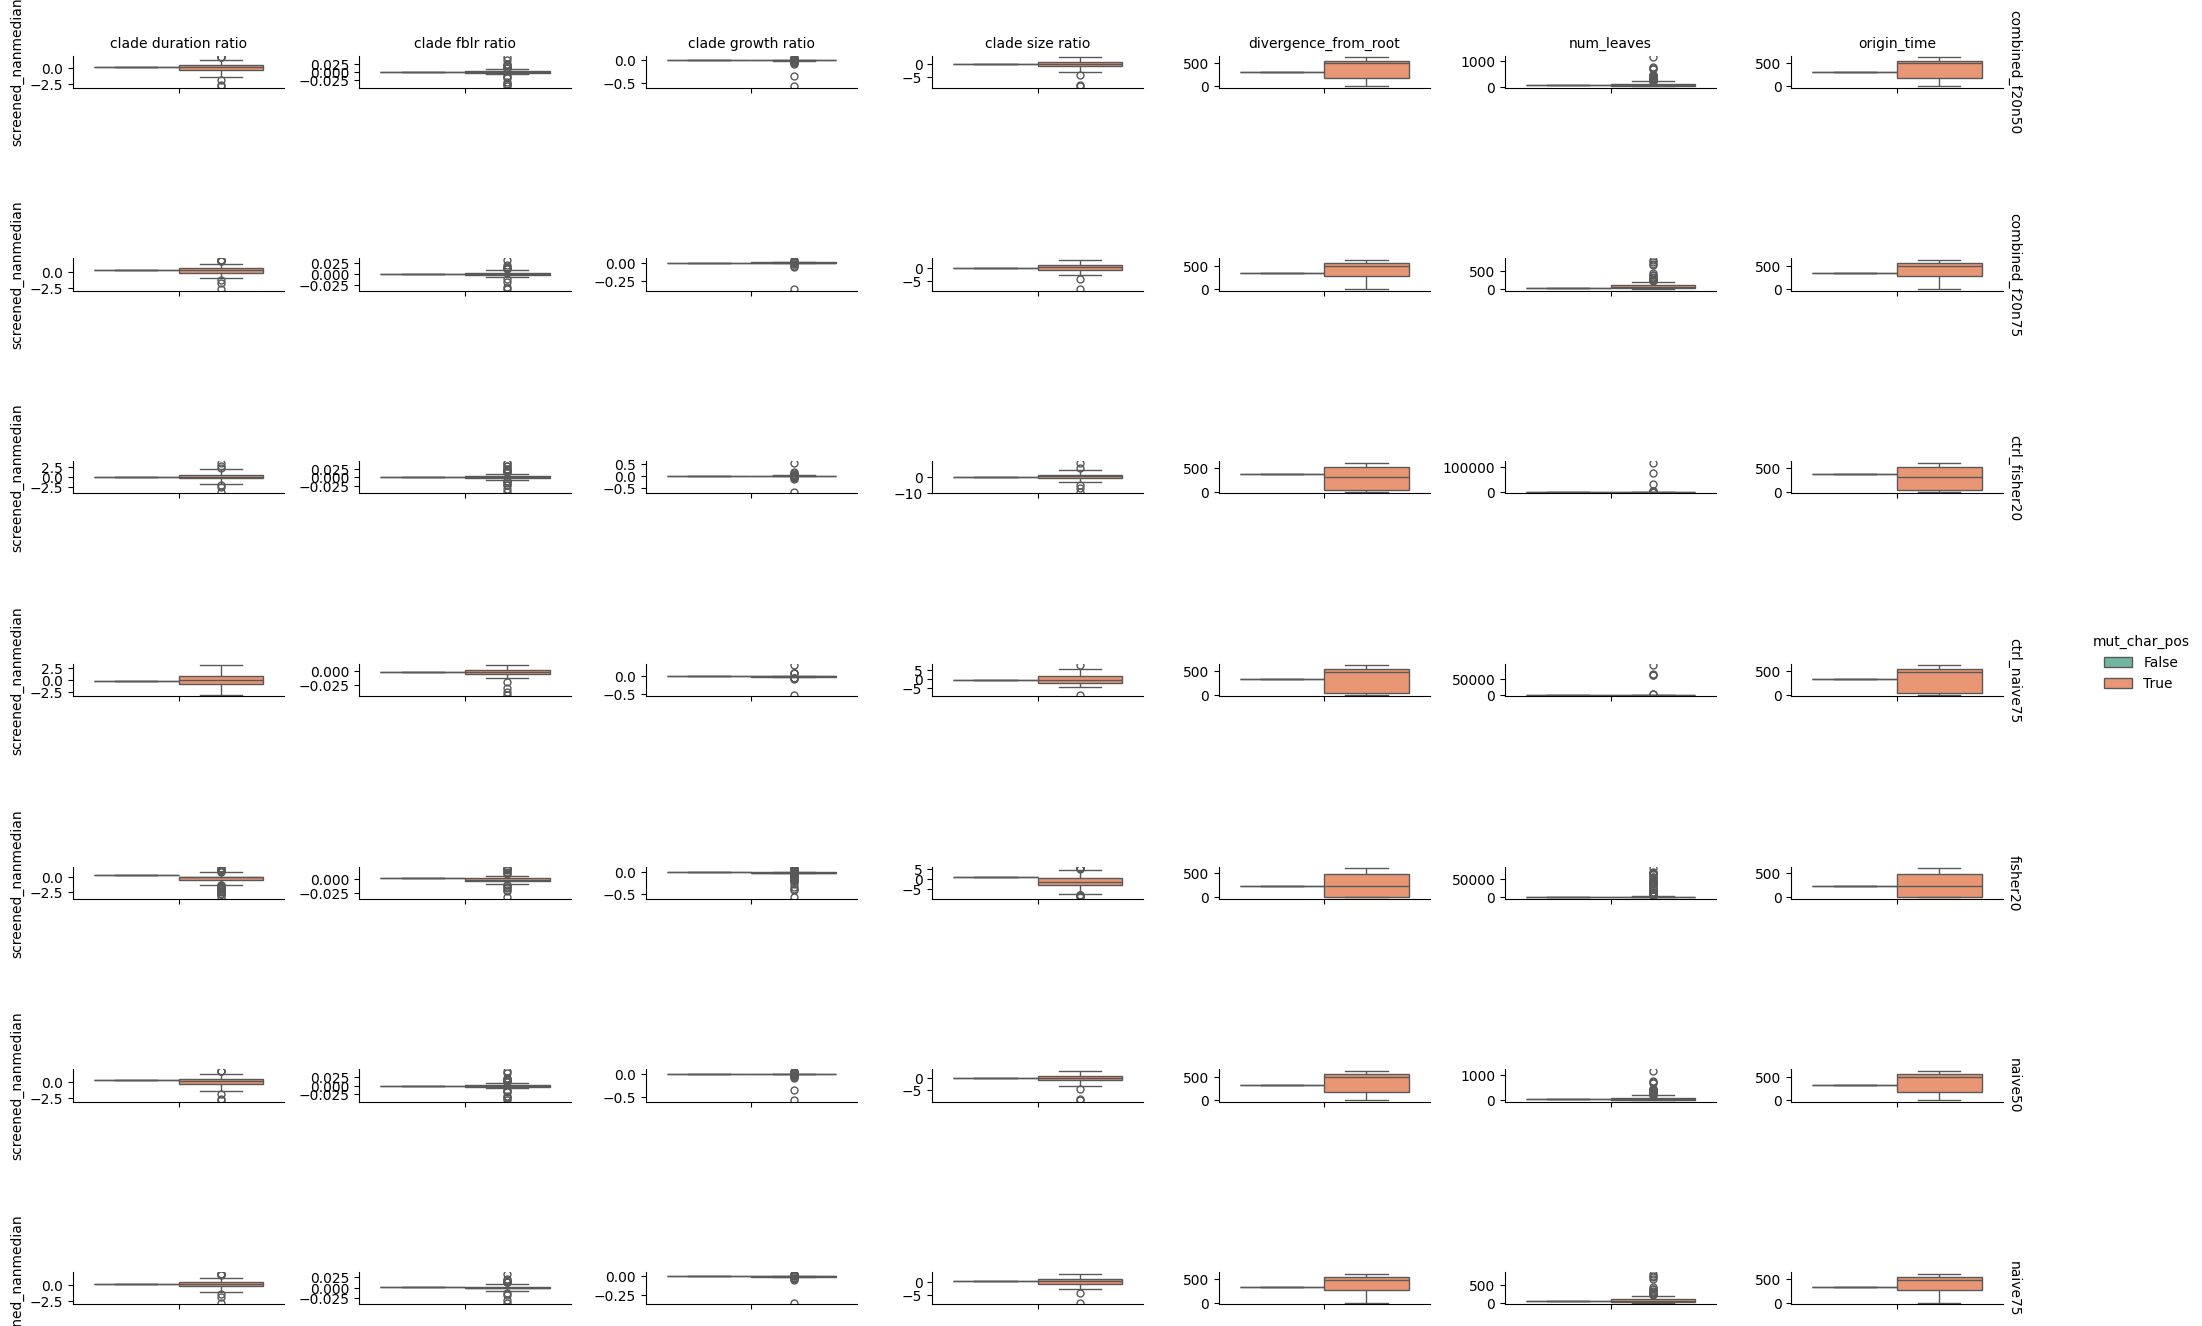

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


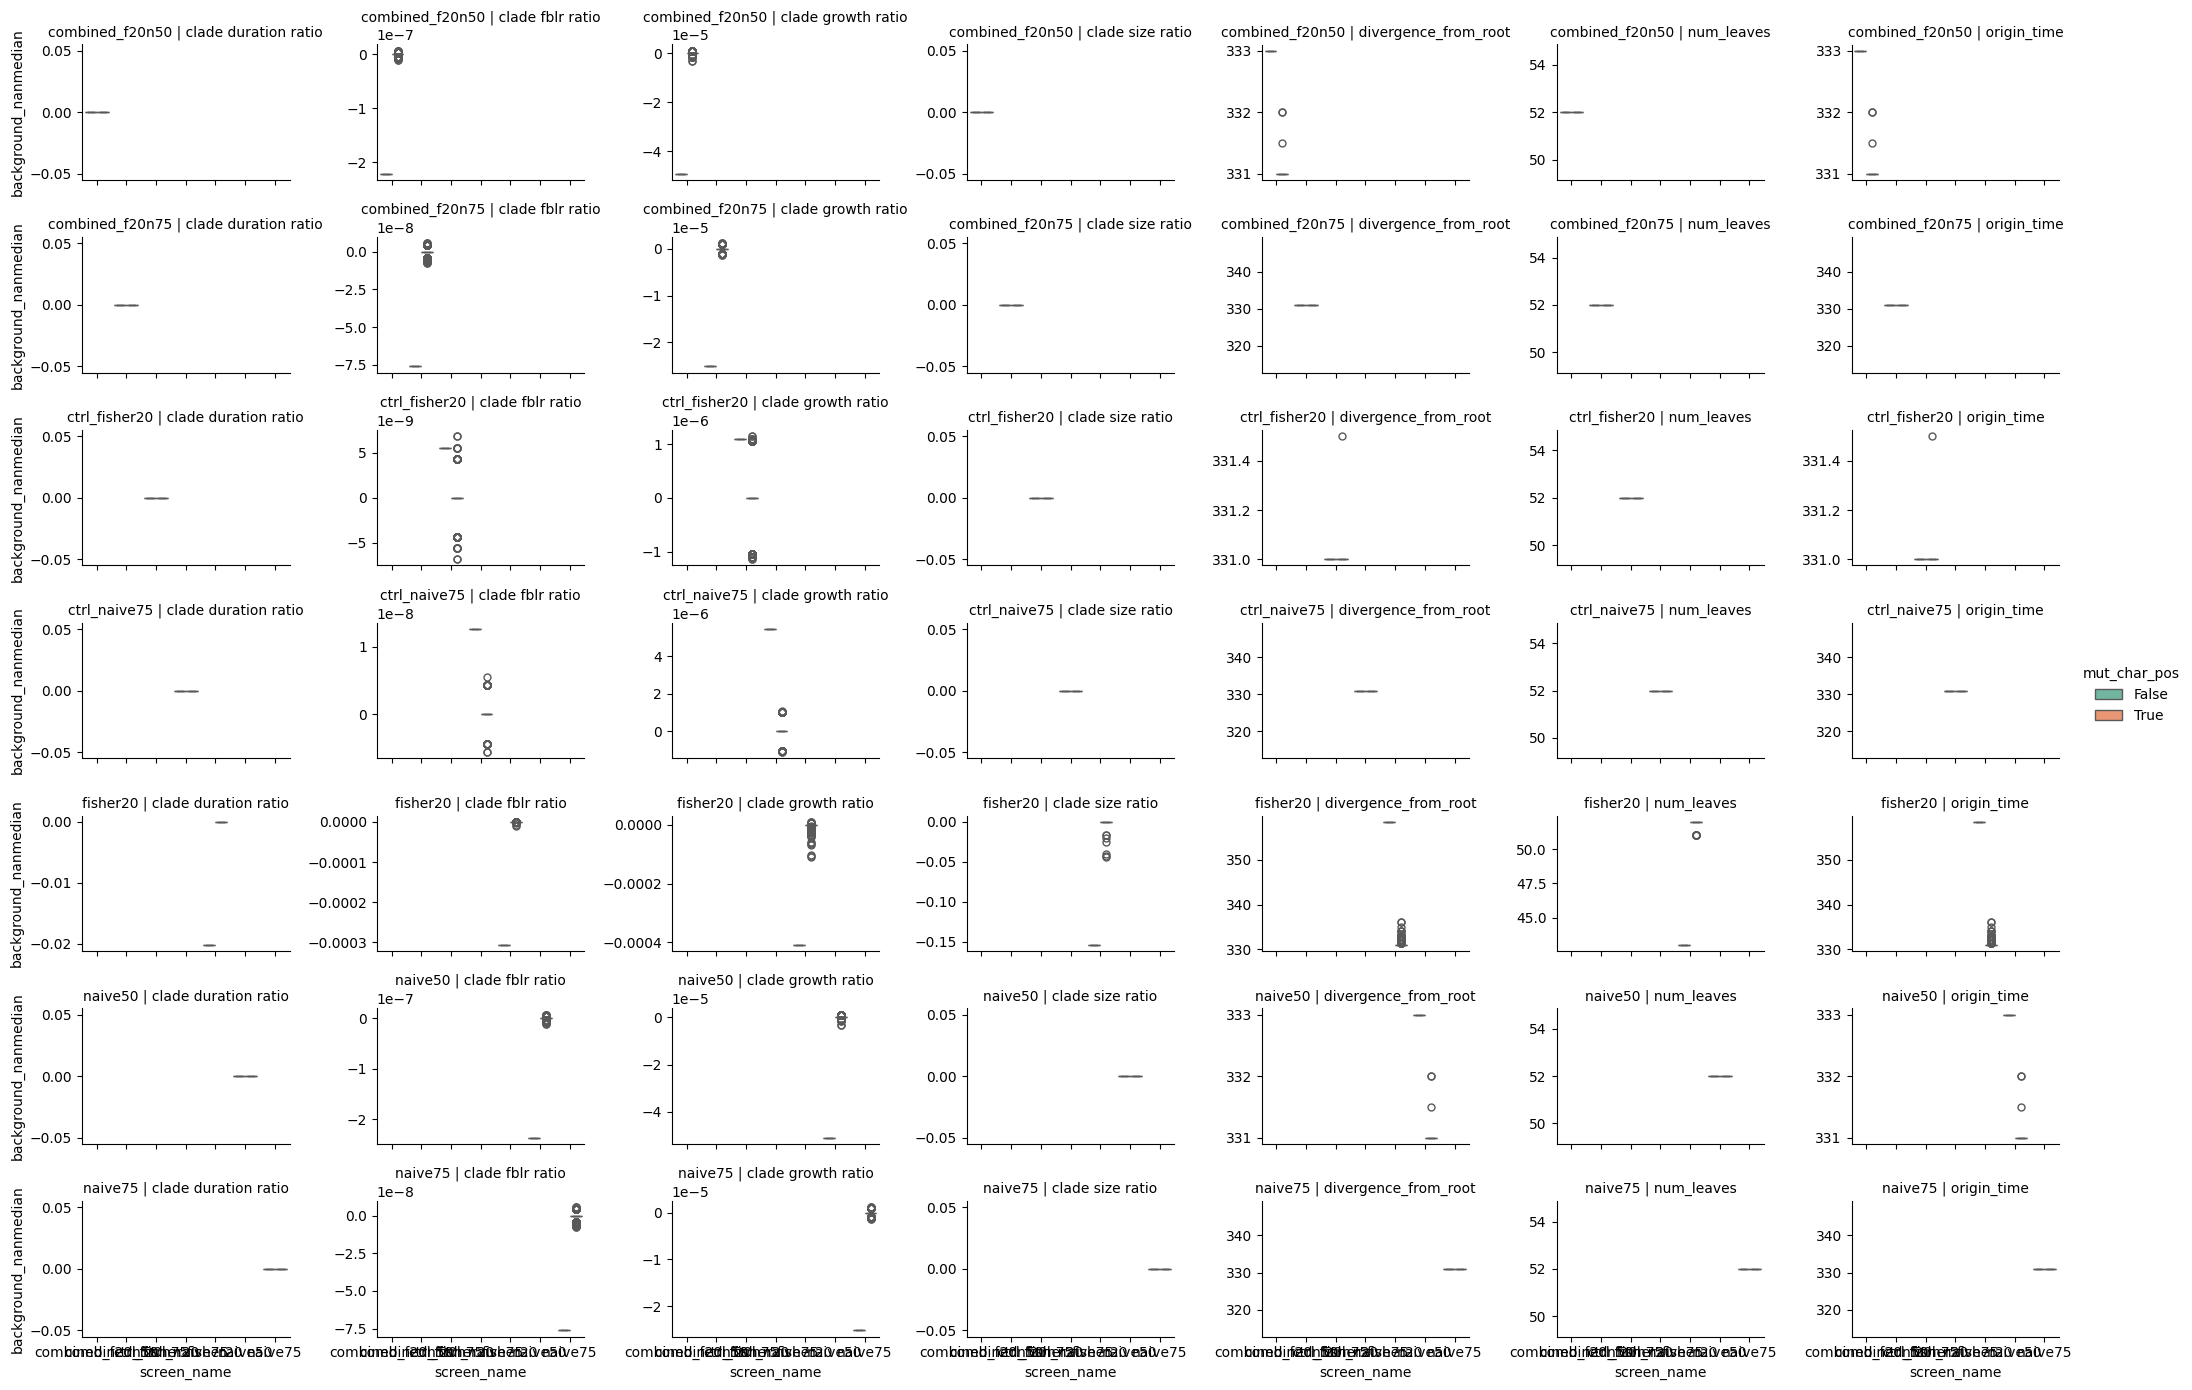

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
